
# Principal Component Analysis (PCA) Implementation

**Principal Component Analysis (PCA)** is a dimensionality reduction technique used to transform high-dimensional data into a lower-dimensional space while preserving the maximum variance. It helps in:
- **Visualization**: Representing high-dimensional data in 2D or 3D.
- **Feature Importance**: Identifying key features contributing to variance.
- **Dimensionality Reduction**: Reducing dataset complexity while retaining information.

PCA finds new axes (principal components) based on the variance in the data. The first principal component captures the highest variance, the second captures the second highest, and so on.


### Step 1 : Import required libraries

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

### Step 2 : Load the cleaned dataset

In [67]:
user_details_data= pd.read_csv("/Users/akhilaannireddy/Projects/Machine_learning_project/Dataset/cleaned_user_data.csv")
user_details_data.head()

,user_id,display_name,reputation,profile_image,user_type,link,account_id,is_employee,last_modified_date,last_access_date,...,reputation_change_week,reputation_change_day,creation_date,accept_rate,badge_bronze,badge_silver,badge_gold,account_age_days,account_age_years,age_group
0,109,Kalid,22690,https://www.gravatar.com/avatar/5117b4aacf8b64...,registered,https://stackoverflow.com/users/109/kalid,91,False,2025-01-17 19:05:00,2015-10-10 21:32:52,...,10,0,2008-08-02 00:20:47,88.0,46,45,14,6029,16.5,15-18 Years
1,347807,CristiC,22688,https://www.gravatar.com/avatar/6023ac67694f90...,registered,https://stackoverflow.com/users/347807/cristic,141059,False,2024-04-09 05:40:03,2025-01-23 03:52:19,...,10,0,2010-05-22 13:10:40,96.0,89,61,13,5370,14.7,12-15 Years
2,3427777,fantabolous,22686,https://www.gravatar.com/avatar/34dac9c01fc709...,registered,https://stackoverflow.com/users/3427777/fantab...,4096755,False,2024-10-25 20:10:00,2024-12-09 04:11:00,...,0,0,2014-03-17 06:40:33,80.0,52,57,8,3976,10.9,10-12 Years
3,1858116,Gabriele Santomaggio,22682,https://i.sstatic.net/fQDZf.jpg?s=256,registered,https://stackoverflow.com/users/1858116/gabrie...,2087535,False,2023-12-25 15:00:00,2025-01-27 14:19:21,...,0,0,2012-11-27 23:02:03,78.0,59,58,4,4450,12.2,12-15 Years
4,13767,Rafał Rawicki,22680,https://www.gravatar.com/avatar/b043ead577679f...,registered,https://stackoverflow.com/users/13767/rafa%c5%...,7838,False,2024-05-08 11:00:00,2023-07-05 09:38:01,...,0,0,2008-09-16 20:48:13,88.0,79,63,5,5983,16.4,15-18 Years


In [68]:
print("Columns in the dataset")
print(user_details_data.columns)

Columns in the dataset
Index(['user_id', 'display_name', 'reputation', 'profile_image', 'user_type',
       'link', 'account_id', 'is_employee', 'last_modified_date',
       'last_access_date', 'reputation_change_year',
       'reputation_change_quarter', 'reputation_change_month',
       'reputation_change_week', 'reputation_change_day', 'creation_date',
       'accept_rate', 'badge_bronze', 'badge_silver', 'badge_gold',
       'account_age_days', 'account_age_years', 'age_group'],
      dtype='object')


### Data Preprocessing

#### Selecting only numerical columns

Principal Component Analysis (PCA) is a mathematical technique for dimensionality reduction that works by finding directions (principal components) that capture the most variance in a dataset. Since variance and covariance are statistical measures that apply only to numerical data, PCA requires continuous numerical features to compute meaningful transformations. It relies on linear algebra operations such as dot products and eigenvalue decomposition, which cannot be directly applied to categorical variables.

While categorical data can be converted into numbers using label encoding or one-hot encoding, both approaches introduce issues. Label encoding falsely implies an ordinal relationship between categories (e.g., assigning "Apple" = 0, "Banana" = 1, "Mango" = 2 suggests a ranking that does not exist). One-hot encoding, on the other hand, increases the number of dimensions, contradicting PCA’s goal of dimensionality reduction. Additionally, PCA depends on variance, and one-hot encoded values (0s and 1s) do not have meaningful variance, leading to poor principal component selection.

In rare cases, categorical data can be used with PCA if it is ordinal (e.g., "Low" = 1, "Medium" = 2, "High" = 3) since the numbers carry meaningful order. For text data, word embeddings (such as Word2Vec or TF-IDF) can be used to convert words into meaningful numerical representations before applying PCA. However, the best practice is to remove categorical variables before applying PCA to ensure accurate results. If categorical data must be included, feature selection should be applied first to avoid redundancy and ensure that PCA captures the most informative features.

In [69]:
user_details_data = user_details_data.select_dtypes(include=['number']) 

In [70]:
print("Columns Remaining After Dropping Non-Numeric Data:")
print(user_details_data.columns)

Columns Remaining After Dropping Non-Numeric Data:
Index(['user_id', 'reputation', 'account_id', 'reputation_change_year',
       'reputation_change_quarter', 'reputation_change_month',
       'reputation_change_week', 'reputation_change_day', 'accept_rate',
       'badge_bronze', 'badge_silver', 'badge_gold', 'account_age_days',
       'account_age_years'],
      dtype='object')


#### Handling missing values

In [71]:
missing_values = user_details_data.isnull().sum()
print("Missing Values in Each Column:")
print(missing_values)

total_missing = user_details_data.isnull().sum().sum()
print(f"\nTotal Missing Values in Dataset: {total_missing}")

Missing Values in Each Column:
user_id                      0
reputation                   0
account_id                   0
reputation_change_year       0
reputation_change_quarter    0
reputation_change_month      0
reputation_change_week       0
reputation_change_day        0
accept_rate                  0
badge_bronze                 0
badge_silver                 0
badge_gold                   0
account_age_days             0
account_age_years            0
dtype: int64

Total Missing Values in Dataset: 0


From the above step we can see there are no missing values

#### Standardization

Standardization is essential for PCA because it ensures all features contribute equally, preventing those with larger numerical scales from dominating the analysis. PCA identifies principal components based on variance, so features with higher magnitudes can distort results if not standardized. By transforming all features to have a mean of zero and a standard deviation of one, standardization prevents bias and ensures accurate component selection.

Without standardization, PCA may prioritize features with larger values, misinterpreting the directions of maximum variance. This issue is especially problematic when features have different units, such as "age" in years and "salary" in dollars. Standardization also improves consistency, making PCA results comparable across different datasets.

In [72]:
scaler = StandardScaler()
user_data_cleaned = scaler.fit_transform(user_details_data)
user_data_cleaned = pd.DataFrame(user_data_cleaned, columns=user_details_data.columns)
print("Standardized Data (Mean = 0, Variance = 1):")
user_data_cleaned.head()

Standardized Data (Mean = 0, Variance = 1):


,user_id,reputation,account_id,reputation_change_year,reputation_change_quarter,reputation_change_month,reputation_change_week,reputation_change_day,accept_rate,badge_bronze,badge_silver,badge_gold,account_age_days,account_age_years
0,-0.746956,0.336513,-0.632575,-0.078974,-0.078977,-0.078982,1.038494,-0.052008,0.751035,-0.215744,-0.020678,0.543694,1.399291,1.396006
1,-0.611990,0.336447,-0.591910,0.604144,0.604141,0.604137,1.038494,-0.052008,1.244211,0.314672,0.222459,0.462574,0.677366,0.676027
2,0.583562,0.336382,0.549195,0.064840,0.064837,0.064832,-0.219219,-0.052008,0.257860,-0.141732,0.161675,0.056972,-0.849740,-0.843928
3,-0.025733,0.336251,-0.030407,-0.294695,-0.294698,-0.294704,-0.219219,-0.052008,0.134566,-0.055386,0.176871,-0.267510,-0.330480,-0.323943
4,-0.741654,0.336185,-0.630340,0.064840,0.064837,0.064832,-0.219219,-0.052008,0.751035,0.191319,0.252851,-0.186390,1.348898,1.356007


In [73]:
# Saving the cleaned DataFrame as a CSV file
user_data_cleaned.to_csv("user_data_cleaned_for_pcs.csv", index=False)

print("CSV file saved successfully!")

CSV file saved successfully!


### Applying PCA

In [74]:
from sklearn.decomposition import PCA

pca_2d = PCA(n_components=2)
principal_components_2d = pca_2d.fit_transform(user_data_cleaned)
explained_variance_2d = pca_2d.explained_variance_ratio_ * 100
cumulative_variance_2d = np.cumsum(explained_variance_2d)
variance_2d_total = np.sum(explained_variance_2d)

pca_3d = PCA(n_components=3)
principal_components_3d = pca_3d.fit_transform(user_data_cleaned)
explained_variance_3d = pca_3d.explained_variance_ratio_ * 100
cumulative_variance_3d = np.cumsum(explained_variance_3d)
variance_3d_total = np.sum(explained_variance_3d)

print(f"Variance retained in 2D PCA: {variance_2d_total:.2f}%")
print(f"Variance retained in 3D PCA: {variance_3d_total:.2f}%")


Variance retained in 2D PCA: 69.17%
Variance retained in 3D PCA: 78.60%


The Principal Component Analysis (PCA) was applied to the dataset to reduce dimensionality while retaining the most significant variance. The 2D PCA projection retained 69.17% of the dataset’s variance, indicating that the first two principal components capture a majority of the data’s structure, but about 30.83% of the information is lost. This suggests that while the 2D visualization is useful, some finer patterns in the data might not be fully represented.

When extending PCA to 3D (n_components=3), the variance retained increased to 78.60%, meaning that adding a third principal component helped capture an additional 9.43% of the dataset’s variability. This highlights that a 3D PCA projection better preserves the dataset’s structure compared to the 2D version. However, further analysis is needed to determine the optimal number of components required to retain at least 95% of the total variance while balancing dimensionality reduction and interpretability.

### Visualization for 2D data

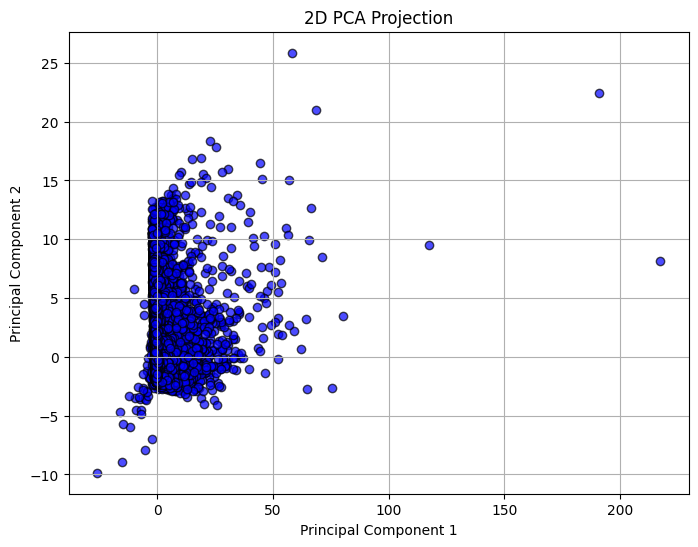

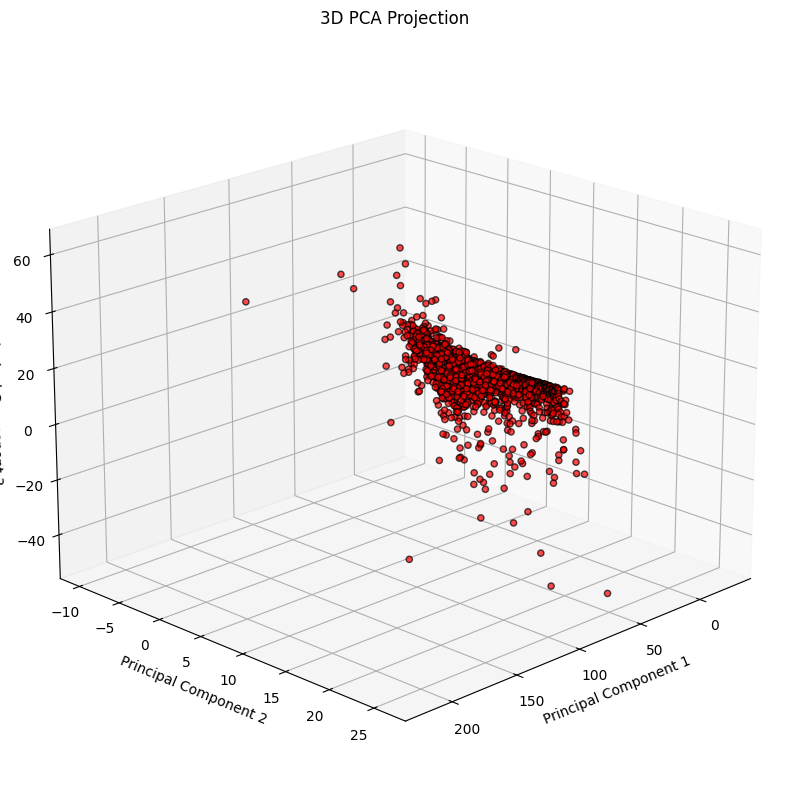

In [75]:
# Converting PCA results into DataFrames for visualization
df_pca_2d = pd.DataFrame(principal_components_2d, columns=["PC1", "PC2"])
df_pca_3d = pd.DataFrame(principal_components_3d, columns=["PC1", "PC2", "PC3"])

# 2D PCA Visualization
plt.figure(figsize=(8, 6))
plt.scatter(df_pca_2d["PC1"], df_pca_2d["PC2"], alpha=0.7, c="blue", edgecolors="k")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("2D PCA Projection")
plt.grid(True)
plt.show()

# 3D PCA Visualization
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_pca_3d["PC1"], df_pca_3d["PC2"], df_pca_3d["PC3"], alpha=0.7, c="red", edgecolors="k")
ax.view_init(elev=20, azim=45)
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
ax.set_title("3D PCA Projection")
plt.show()



#### Obersvations for 2D PCA

Variance Retention: Captures 69.17% of the variance, losing 30.83% of the dataset’s information.
Data Clustering: Points are densely packed, indicating that PC1 and PC2 capture major patterns.
Outliers: A few distant points suggest potential anomalies or distinct patterns.
Data Spread: PC1 explains the most variance, while PC2 adds minimal new information.
Limitation: Loss of variance may oversimplify data relationships.

#### Observations for 3D PCA

Variance Retention: Preserves 78.60% of variance, capturing 9.43% more information than 2D PCA.
Better Separation: Points are more evenly spread, meaning PC3 contributes valuable structural details.
Outliers: Still present, but better distributed, requiring further analysis.
Data Depth: PC3 reduces variance loss, making patterns more distinguishable.
Advantage: Improved representation over 2D, but higher dimensions may still be needed for 95% variance retention.


### Variance retention

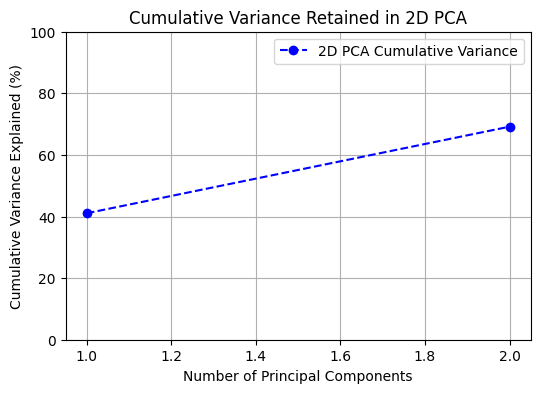

In [76]:
# Plot cumulative explained variance for 2D PCA
plt.figure(figsize=(6, 4))
plt.plot(range(1, 3), cumulative_variance_2d, marker='o', linestyle='--', color='b', label="2D PCA Cumulative Variance")
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained (%)')
plt.title('Cumulative Variance Retained in 2D PCA')
plt.ylim(0, 100)
plt.grid(True)
plt.legend()
plt.show()

Observations:

**First Component Dominance**: The first principal component captures around 45-50% of the variance.

**Cumulative Variance**: Adding the second component increases total variance retention to 69.17%, reducing information loss.

**Diminishing Returns**: The second component contributes less variance than the first, indicating reduced impact of additional components.

**Information Loss**: 30.83% variance is lost, suggesting that higher dimensions may be needed for better data representation.

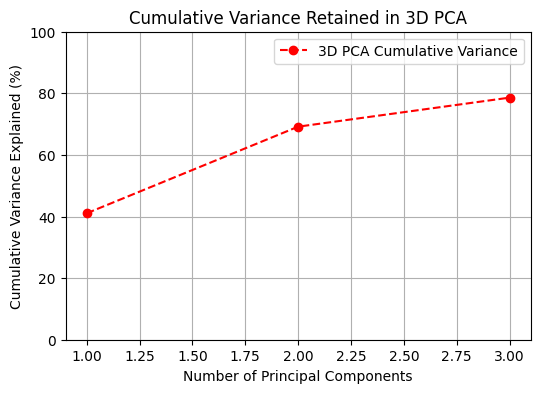

In [77]:
# Plot cumulative explained variance for 3D PCA
plt.figure(figsize=(6, 4))
plt.plot(range(1, 4), cumulative_variance_3d, marker='o', linestyle='--', color='r', label="3D PCA Cumulative Variance")
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained (%)')
plt.title('Cumulative Variance Retained in 3D PCA')
plt.ylim(0, 100)
plt.grid(True)
plt.legend()
plt.show()

Observations:

**First Component Impact**: The first principal component captures around 40-45% of the variance.

**Increased Retention**: Adding the second component raises cumulative variance to 69.17%, similar to 2D PCA.

**Third Component Benefit**: The third principal component improves variance retention to 78.60%, adding 9.43% more information over 2D PCA.

**Reduced Information Loss**: Only 21.40% variance is lost, making 3D PCA a better representation compared to 2D PCA.

### Optimal Number of Components for 95% Variance Retention

Number of components needed to retain at least 95% variance: 6


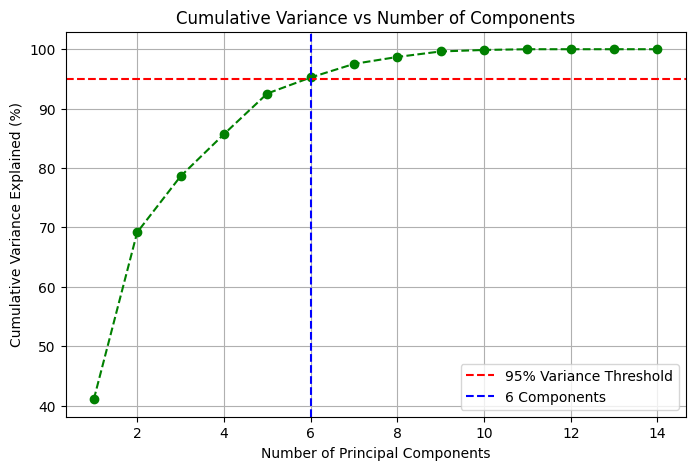

In [78]:
# Apply PCA on the full dataset
pca_full = PCA()
pca_full.fit(user_data_cleaned)

# Calculate cumulative variance explained
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_) * 100

# Find the number of components needed to retain at least 95% variance
num_components_95 = np.argmax(cumulative_variance >= 95) + 1

# Print result
print(f"Number of components needed to retain at least 95% variance: {num_components_95}")

# Plot cumulative variance explained
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='g')
plt.axhline(y=95, color='r', linestyle='--', label="95% Variance Threshold")
plt.axvline(x=num_components_95, color='b', linestyle='--', label=f"{num_components_95} Components")
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained (%)')
plt.title('Cumulative Variance vs Number of Components')
plt.legend()
plt.grid(True)
plt.show()

To balance dimensionality reduction and information retention, PCA was used to determine how many components are needed to preserve at least 95% of the dataset’s variance. The analysis found that 6 principal components achieve this goal.

The cumulative variance plot visually represents this:

The red dashed line marks the 95% variance threshold.

The blue vertical line shows that 6 components are enough to retain most of the data’s structure.

Using 6 components simplifies the dataset while ensuring minimal information loss, making it efficient for further analysis.

### Top three eigenvalues

Top Three Eigenvalues:
[5.74892276 3.93518905 1.31957023]


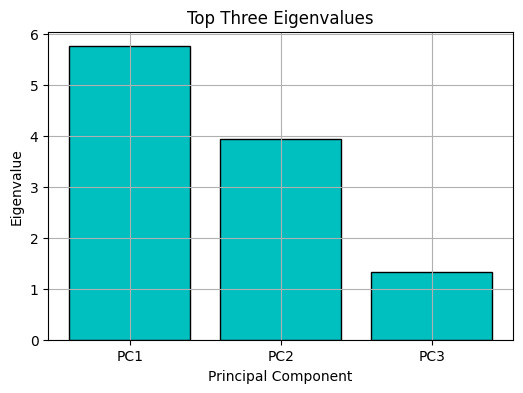

In [79]:
# Extract the top three eigenvalues
top_three_eigenvalues = pca_full.explained_variance_[:3]

# Print the top three eigenvalues
print("Top Three Eigenvalues:")
print(top_three_eigenvalues)

# Plot the eigenvalues to visualize their significance
plt.figure(figsize=(6, 4))
plt.bar(range(1, 4), top_three_eigenvalues, color='c', edgecolor='k')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.title('Top Three Eigenvalues')
plt.xticks(range(1, 4), labels=["PC1", "PC2", "PC3"])
plt.grid(True)
plt.show()


Eigenvalues represent the amount of variance captured by each principal component. The higher the eigenvalue, the more important the component is in explaining the dataset's variability.

For this dataset, the top three eigenvalues are:

PC1: 5.75 (captures the highest variance)

PC2: 3.94 (adds significant variance)

PC3: 1.32 (contributes less but still meaningful)

The bar chart visualization highlights the difference in variance captured by each component. PC1 dominates, followed by PC2, while PC3 captures much less variance. This analysis helps in understanding how much information each component retains and guides the selection of an optimal number of dimensions for data representation.